In [2]:
pip install "geoai-py[all]"


In [3]:
import geoai
import leafmap

In [43]:
m = leafmap.Map(center=[12.986311, 77.8114578], zoom=20, height="800px")
m.add_basemap("Satellite")
m

Map(center=[12.986311, 77.8114578], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [44]:
if m.user_roi is not None:
    bbox = m.user_roi_bounds()
    print("Bounding Box:", bbox)
else:
    print("No ROI selected.")

Bounding Box: [77.8114, 12.9859, 77.8126, 12.9868]


In [45]:
image = "Satellite_Image.tif"
leafmap.map_tiles_to_geotiff(
    output=image, bbox=bbox, zoom=22, source="Satellite", overwrite=True
)

Downloaded image 1/180
Downloaded image 2/180
Downloaded image 3/180
Downloaded image 4/180
Downloaded image 5/180
Downloaded image 6/180
Downloaded image 7/180
Downloaded image 8/180
Downloaded image 9/180
Downloaded image 10/180
Downloaded image 11/180
Downloaded image 12/180
Downloaded image 13/180
Downloaded image 14/180
Downloaded image 15/180
Downloaded image 16/180
Downloaded image 17/180
Downloaded image 18/180
Downloaded image 19/180
Downloaded image 20/180
Downloaded image 21/180
Downloaded image 22/180
Downloaded image 23/180
Downloaded image 24/180
Downloaded image 25/180
Downloaded image 26/180
Downloaded image 27/180
Downloaded image 28/180
Downloaded image 29/180
Downloaded image 30/180
Downloaded image 31/180
Downloaded image 32/180
Downloaded image 33/180
Downloaded image 34/180
Downloaded image 35/180
Downloaded image 36/180
Downloaded image 37/180
Downloaded image 38/180
Downloaded image 39/180
Downloaded image 40/180
Downloaded image 41/180
Downloaded image 42/180
D

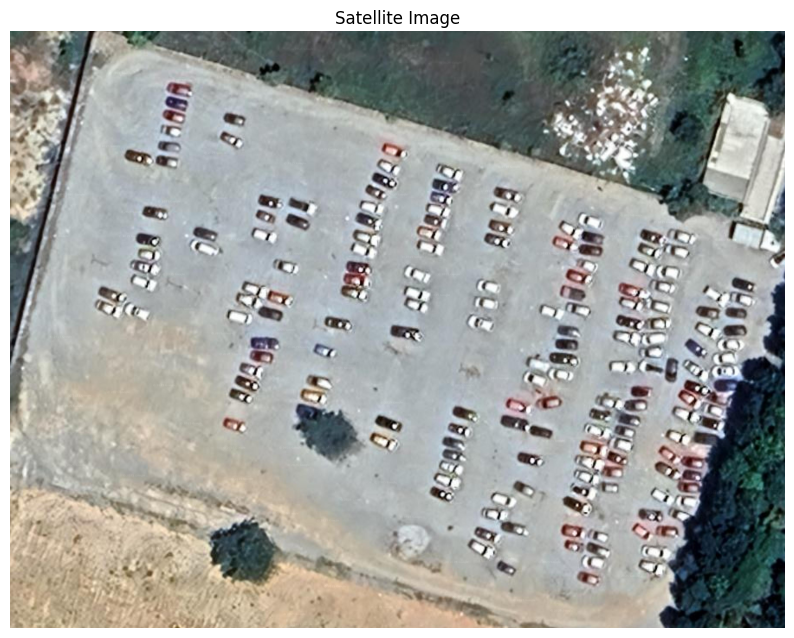

In [46]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

image_path = "/content/Satellite_Image.tif"

with rasterio.open(image_path) as src:
    image = src.read()
    image = np.moveaxis(image, 0, -1)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.title("Satellite Image")
plt.show()


In [47]:
detector = geoai.CarDetector()

Model path not specified, downloading from Hugging Face...
Model downloaded to: /root/.cache/huggingface/hub/models--giswqs--geoai/snapshots/c4b9e7e7686c41a4fa7e4d5dd97f03853e088e4d/car_detection_usa.pth
Model loaded successfully


In [81]:
mask_path = detector.generate_masks(
    raster_path=image_path,
    output_path="cars_masks.tif",
    confidence_threshold=0.7,
    mask_threshold=0.5,
    overlap=0.10,
    chip_size=(2048, 2048),
)


Dataset initialized with 2 rows and 2 columns of chips
Image dimensions: 3579 x 2755 pixels
Chip size: 2048 x 2048 pixels
Overlap: 10.0% (stride_x=1843, stride_y=1843)
CRS: EPSG:3857
Processing raster with 1 batches


100%|██████████| 1/1 [00:11<00:00, 11.48s/it]

Masks with confidence values saved to cars_masks.tif


In [82]:
gdf = detector.vectorize_masks(
    masks_path="cars_masks.tif",
    output_path="cars.geojson",
    min_object_area=100,
    max_object_area=2000,
)

Processing masks from: cars_masks.tif
Found 165 connected components


Processing components: 100%|██████████| 165/165 [00:01<00:00, 103.49it/s]

Saved 165 cars with confidence to cars.geojson


In [83]:
gdf = geoai.add_geometric_properties(gdf)

In [84]:
geoai.view_vector_interactive(gdf, column="confidence")

In [85]:
m.add_geojson("cars.geojson", style={"color": "yellow", "fillOpacity": 0.3})
m

Map(bottom=124450525.0, center=[12.986727073085435, 77.81191043272582], controls=(ZoomControl(options=['positi…